# Wikiface > pas retenu

### Package à installer

In [ ]:
# !pip install pyarrow
# !pip install fastparquet
# !pip install huggingface_hub
# !pip install datasets

  Using cached fsspec-2025.3.0-py3-none-any.whl.metadata (11 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 3.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 4.0 MB/s eta 0:00:0000:0100:01
Using cached fsspec-2025.3.0-py3-none-any.whl (193 kB)


### Import d'un jeu de données test de Wikiart face en dataframe

In [ ]:
import pandas as pd

df = pd.read_parquet("../../delorean_art_data/test-00000-of-00001.parquet")
df.head()

In [3]:
df.keys()

Index(['image', 'id', 'title', 'url', 'artistUrl', 'artistName', 'artistId',
       'completitionYear', 'dictionaries', 'location', 'period', 'serie',
       'genres', 'styles', 'media', 'sizeX', 'sizeY', 'diameter', 'galleries',
       'tags', 'description', 'width', 'height', 'group'],
      dtype='object')

In [6]:
df.isna().sum()

image                  0
id                     0
title                  0
url                    0
artistUrl              0
artistName             0
artistId               0
completitionYear    1350
dictionaries           0
location               0
period              5847
serie               6084
genres                 0
styles                 0
media                  0
sizeX               4420
sizeY               4416
diameter            6134
galleries              0
tags                   0
description            0
width                  0
height                 0
group                  0
dtype: int64

### Visualisation d'1 image

In [7]:
dict_img = df['image'].iloc[2]
dict_img['bytes']

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00`\x00`\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x02X\x01\xfc\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca\xd2\xd3\xd4\xd5\x

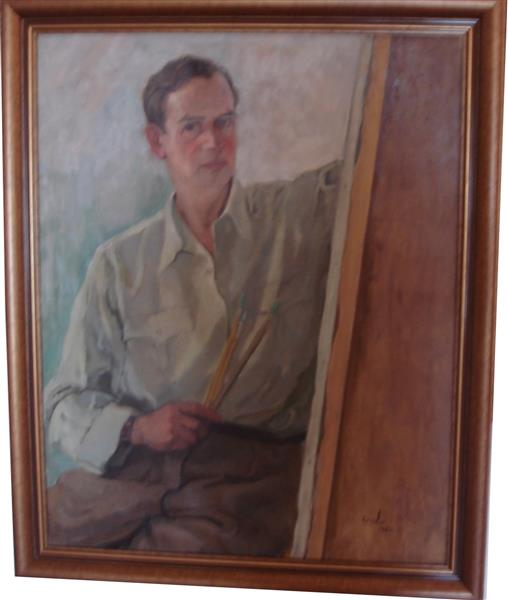

In [8]:
from PIL import Image
import io

image_data = dict_img['bytes']
image = Image.open(io.BytesIO(image_data))
# image.show()
display(image)

In [9]:
import numpy as np
np.array(image).shape

(600, 508, 3)

### On ne garde que les infos que nous souhaitons et transforme en np.array

In [10]:
df_small = df[['image', 'title', 'artistName']].copy()

In [1]:
df_small['im_array'] = df_small['image'].apply(lambda x : np.array(Image.open(io.BytesIO(x['bytes']))))

NameError: name 'df_small' is not defined

In [12]:
df_small

,image,title,artistName,im_array
0,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,Female Portrait,Adalbert Erdeli,"[[[219, 201, 161], [231, 213, 173], [230, 212,..."
1,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,Portrait of the Famous Ukrainian Artist Tatian...,Adalbert Erdeli,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
2,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,Self Portrait,Adalbert Erdeli,"[[[113, 70, 64], [104, 61, 55], [98, 55, 48], ..."
3,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,Vater des Künstlers,Adolf Dietrich,"[[[81, 78, 73], [72, 69, 64], [56, 53, 48], [5..."
4,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,Portrait of the young de Bros,Albrecht Anker,"[[[88, 46, 34], [100, 58, 46], [112, 70, 58], ..."
...,...,...,...,...
6130,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,The old lady in a bonnet. Brittany,Zinaida Serebriakova,"[[[182, 169, 150], [194, 181, 162], [180, 167,..."
6131,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,Turkey (Two odalisques),Zinaida Serebriakova,"[[[253, 253, 253], [253, 253, 253], [253, 253,..."
6132,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,Two Moroccan,Zinaida Serebriakova,"[[[199, 189, 187], [210, 200, 198], [207, 197,..."
6133,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,Water carrier. Morocco,Zinaida Serebriakova,"[[[219, 208, 204], [235, 224, 220], [223, 212,..."


Ensuite il faut faire une fonction pour sauvegarder le df avec les infos sous format np array dans un CSV. \
Mais finalement nous ne retenons pas cette base de données

# Wikiart

### Install dependencies

In [ ]:
# !pip install kagglehub

zsh:1: no matches found: kagglehub[pandas-datasets]


In [8]:
import pandas as pd

In [19]:
df = pd.read_csv('../../delorean_art_data/wikiart/classes.csv')
df.head()

,filename,artist,genre,description,phash,width,height,genre_count,subset
0,Abstract_Expressionism/aaron-siskind_acolman-1...,aaron siskind,['Abstract Expressionism'],acolman-1-1955,bebbeb018a7d80a8,1922,1382,1,train
1,Abstract_Expressionism/aaron-siskind_chicago-6...,aaron siskind,['Abstract Expressionism'],chicago-6-1961,d7d0781be51fc00e,1382,1746,1,train
2,Abstract_Expressionism/aaron-siskind_glouceste...,aaron siskind,['Abstract Expressionism'],gloucester-16a-1944,9f846e5a6c639325,1382,1857,1,train
3,Abstract_Expressionism/aaron-siskind_jerome-ar...,aaron siskind,['Abstract Expressionism'],jerome-arizona-1949,a5d691f85ac5e4d0,1382,1849,1,train
4,Abstract_Expressionism/aaron-siskind_kentucky-...,aaron siskind,['Abstract Expressionism'],kentucky-4-1951,880df359e6b11db1,1382,1625,1,train


In [20]:
df['description'][0]

'acolman-1-1955'

In [21]:
df.keys()

Index(['filename', 'artist', 'genre', 'description', 'phash', 'width',
       'height', 'genre_count', 'subset'],
      dtype='object')

In [22]:
df[['title', 'year']] = df['description'].str.rsplit('-', n=1, expand=True)
df.head()

,filename,artist,genre,description,phash,width,height,genre_count,subset,title,year
0,Abstract_Expressionism/aaron-siskind_acolman-1...,aaron siskind,['Abstract Expressionism'],acolman-1-1955,bebbeb018a7d80a8,1922,1382,1,train,acolman-1,1955
1,Abstract_Expressionism/aaron-siskind_chicago-6...,aaron siskind,['Abstract Expressionism'],chicago-6-1961,d7d0781be51fc00e,1382,1746,1,train,chicago-6,1961
2,Abstract_Expressionism/aaron-siskind_glouceste...,aaron siskind,['Abstract Expressionism'],gloucester-16a-1944,9f846e5a6c639325,1382,1857,1,train,gloucester-16a,1944
3,Abstract_Expressionism/aaron-siskind_jerome-ar...,aaron siskind,['Abstract Expressionism'],jerome-arizona-1949,a5d691f85ac5e4d0,1382,1849,1,train,jerome-arizona,1949
4,Abstract_Expressionism/aaron-siskind_kentucky-...,aaron siskind,['Abstract Expressionism'],kentucky-4-1951,880df359e6b11db1,1382,1625,1,train,kentucky-4,1951


In [24]:
df_small = df[['artist', 'genre', 'title', 'year']]
df_small.head()

,artist,genre,title,year
0,aaron siskind,['Abstract Expressionism'],acolman-1,1955
1,aaron siskind,['Abstract Expressionism'],chicago-6,1961
2,aaron siskind,['Abstract Expressionism'],gloucester-16a,1944
3,aaron siskind,['Abstract Expressionism'],jerome-arizona,1949
4,aaron siskind,['Abstract Expressionism'],kentucky-4,1951


In [25]:
df_small.isna().sum()

artist       0
genre        0
title        0
year      3574
dtype: int64

In [27]:
df_small.count()

artist    80042
genre     80042
title     80042
year      76468
dtype: int64

# POP plateforme JOCONDE

In [28]:
import requests

In [29]:
url ='https://data.culture.gouv.fr/api/explore/v2.1/catalog/datasets/base-joconde-extrait/records?limit=20'

In [31]:
response = requests.get(url)
if response.status_code != 200 :
    ''
else :
    data = response.json()

In [32]:
data

{'total_count': 706920,
 'results': [{'reference': '02340000161',
   'ancien_depot': None,
   'appellation': None,
   'ancienne_appartenance': None,
   'ancienne_attribution': None,
   'auteur': "SCHNORR J. (graveur);FLAXMAN John (d'après)",
   'bibliographie': None,
   'commentaires': None,
   'presence_image': 'oui',
   'date_d_acquisition': '1912',
   'date_de_depot': None,
   'decouverte_collecte': None,
   'denomination': None,
   'lieu_de_depot': None,
   'description': "L'estampe représente le moment où Ulysse enivre le cyclope Polyphème. Le géant est assis et occupe la majorité de la composition. Ulysse et ses compagnons se tiennent à l'entrée de la caverne sur la gauche, auprès des moutons.",
   'mesures': 'l. 18.7 cm ; H. 14.1 cm',
   'date_de_mise_a_jour': '2021-03-08',
   'date_creation': '2021-03-08',
   'domaine': ['beaux-arts', 'estampe'],
   'region': 'Centre-Val de Loire',
   'departement': 'Cher',
   'date_sujet_represente': None,
   'ecole_pays': None,
   'epoque': N

# Images d'art

In [33]:
import requests
from bs4 import BeautifulSoup
import re

to do :
- Faire une liste vide pour stocker chaque df créé à chaque boucle de pages

For loop
- Faire une boucle for sur les numéros de pages de 1 à ... commencer petit 2 ou 3 (vérifier) 
- Faire une url avec une fstring sur le numéro de page 
- soup 
- chercher les artistes, titres, images
- faire un dataframe pour la boucle/page
- sauvegarde DataFrame_to_csv(pages#) avec le nom de la page/boucle/itération
- time.sleep(15 secondes)

Liste à transforme pd.concat qui va donner un gros dataframe avec toutes les pages
Donner le nom d'une variable pour le df final et sauvegarder sur disque avec DataFrame_to_csv(df_final)



In [40]:
url_imgart = 'https://art.rmngp.fr/fr/library/artworks?locations=Paris%2C%20mus%C3%A9e%20Guimet%20-%20mus%C3%A9e%20national%20des%20Arts%20asiatiques&techniques=encre%20de%20Chine&ajax=1&page=1'
response = requests.get(url_imgart)
soup = BeautifulSoup(response.text, "html.parser")

In [49]:
authors = []
for element in soup.find_all(class_='field--name-ef-summarized-authors-mini'):
    authors.append(element.text)

In [56]:
title = []
for element in soup.find_all(class_='field--name-api-artwork-title'):
    title.append(element.text.strip())

In [51]:
image_url = []
for element in soup.find_all(class_='field--name-api-artwork-main-image'):
    image_url.append(element.find('img').attrs['src'])

In [53]:
len(authors), len(title), len(image_url)

(20, 20, 20)

In [ ]:
df_imgart_guimet = pd.DataFrame({
    'author': authors,
    'title' : title,
    'image_url' : image_url
    })

In [58]:
df_imgart_guimet

,author,title,image_url
0,"Ying Qiu, Anonyme chinois",Portrait d'un dignitaire,https://api.art.rmngp.fr/v1/images/17/249239/l...
1,Shilong Mo,Paysage,https://api.art.rmngp.fr/v1/images/17/238142/l...
2,Ekaku Hakuin,"Hotei figuré par ses attributs (le sac, le bât...",https://api.art.rmngp.fr/v1/images/17/211016/l...
3,Anonyme,Sûtra du diamant (jingang poluomi jing),https://api.art.rmngp.fr/v1/images/17/80791/l?...
4,Zhou Shen,Première ode à la falaise rouge,https://api.art.rmngp.fr/v1/images/17/238764/l...
5,Anonyme chinois,Portrait de Lettré,https://api.art.rmngp.fr/v1/images/17/90428/l?...
6,Dashou Du,Orchidées,https://api.art.rmngp.fr/v1/images/17/241557/l...
7,Zhengming Wen,Hirondelle nouvelle ; Calligraphie,https://api.art.rmngp.fr/v1/images/17/141617/l...
8,,Le Domaine de tous les seigneurs des montagnes...,https://api.art.rmngp.fr/v1/images/17/113055/l...
9,Zhou Shen,Paysage de montagne,https://api.art.rmngp.fr/v1/images/17/245896/l...


In [59]:
df_imgart_guimet['image_url'][0]

'https://api.art.rmngp.fr/v1/images/17/249239/l?t=hgIoKLGTiWBYsbeGS8_KlA'

Pour sauvegarder l'image

In [60]:
url1 = 'https://api.art.rmngp.fr/v1/images/17/249239/l?t=hgIoKLGTiWBYsbeGS8_KlA'

In [61]:
img1 = requests.get(url1)

In [65]:
print(img1.content)

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00`\x00`\x00\x00\xff\xfe\x00;CREATOR: gd-jpeg v1.0 (using IJG JPEG v80), quality = 95\n\xff\xdb\x00C\x00\x02\x01\x01\x01\x01\x01\x02\x01\x01\x01\x02\x02\x02\x02\x02\x04\x03\x02\x02\x02\x02\x05\x04\x04\x03\x04\x06\x05\x06\x06\x06\x05\x06\x06\x06\x07\t\x08\x06\x07\t\x07\x06\x06\x08\x0b\x08\t\n\n\n\n\n\x06\x08\x0b\x0c\x0b\n\x0c\t\n\n\n\xff\xdb\x00C\x01\x02\x02\x02\x02\x02\x02\x05\x03\x03\x05\n\x07\x06\x07\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\xff\xc2\x00\x11\x08\x05/\x02\xf6\x03\x01\x11\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1d\x00\x00\x01\x05\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x03\x02\x04\x05\x06\x07\x01\x00\x08\t\xff\xc4\x00\x1b\x01\x00\x02\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x00\x03\x04\x05\x06\x07\xff\xda\x00\x0c\x03\x01\x00\x02\x10\x03\x10\x00\x00\x01\xf9 \xf1\xfag\x8a\xf6N\x81\xc0\xe4+\xc9;\'Zyg\x0c\xe9*+\xd9:G \xe0oI\xd5\x9c\x8